# AIDM7330 Basic Programming for Data Science
## AY 2024/2025 Semester 1

# Exam Notebook
# 24h (+) Data Analysis and Visualization Challenge

# <div style="color: orange">Submission deadline Sunday, 15 December 2024 @23:59</div>
# Deliverables
1. This Jupyter notebook (in .ipynb format), with all cells already executed

# <div style="color: red">Please Complete This Section</div>
## Student Information
Student Name (English): _ZhangHuiyi_______

Student ID: ___24474940____________

## Declaration of Integrity

**I confirm that the work for the following exam notebook was solely undertaken by myself and that no help was provided from other sources as those allowed.**

Please type your name and today’s date on the following fields if you agree with the statement. **<ins>Failing to do so your submission will not be considered valid.</ins>**

Name: ___ZhangHuiyi____________

Date: ____2024.12.14___________

# <div style="color: LimeGreen">Part 1: Project Setup [10%]</div>

# 1.1 Load the Libraries (1')
Import all the required libraries in this section (e.g. pandas, numpy, etc.)

In [3]:
#important command to display IMMEDIATELY your plots
%matplotlib inline
!{sys.executable} -m pip install wordcloud
!pip install wget

In [4]:
import wget
from PIL import Image
from google.colab import drive
import pandas as pd
import functools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from google.colab import drive

# 1.2 Import the datasets in Pandas (1')
Import the datasets for:
- Netflix
- PrimeVideo
- Hulu
- Disney Plus

Use multiple dataframes.

In [5]:
csvMap = {
    'Netflix': '/content/MoviesOnNetflix.csv',
    'DisneyPlus': '/content/MoviesOnDisneyPlus.csv',
    'Hulu': '/content/MoviesOnHulu.csv',
    'PrimeVideo': '/content/MoviesOnPrimeVideo.csv'
}

pdMap = {}
for key in csvMap:
    pdMap[key] = pd.read_csv(csvMap[key])

# 1.3 Print shape, head and tail of the dataframes (1')

In [6]:
def printPdInfo(name, map=pdMap):
    if name not in map:
        print('Error: name not in map')
        return
    print(name, '.shape:')
    print(map[name].shape)
    print(name, '.columns:')
    print(map[name].columns)
    print(name, '.head():')
    print(map[name].head())


printPdInfo('Netflix')
printPdInfo('DisneyPlus')
printPdInfo('Hulu')
printPdInfo('PrimeVideo')

Netflix .shape:
(16744, 13)
Netflix .columns:
Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Directors', 'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')
Netflix .head():
   Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix                       Directors  \
0             87%        1               Christopher Nolan   
1             87%        1  Lana Wachowski,Lilly Wachowski   
2             84%        1         Anthony Russo,Joe Russo   
3             96%        1                 Robert Zemeckis   
4             97%        1    

# 1.4 Merge the dataframes into a single dataframe (2')
Avoid duplicated columns

In [68]:
# Remove the index entries for NetflixPd, DisneyPlusPd, HuluPd, and PrimeVideoPd from pdMap, and merge according to ID.
removeIndexMap = {}
for key in pdMap:
    removeIndexMap[key] = pdMap[key].drop(columns=['Unnamed: 0'])

public_columns = functools.reduce(lambda x, y: [i for i in x if i in y], [removeIndexMap[key].columns for key in removeIndexMap])

combined_df = functools.reduce(
    lambda left, right: pd.merge(left, right, how='outer',on=public_columns),
    [removeIndexMap[key] for key in removeIndexMap]
)

# <div style="color: red">COMPULSORY STEPS</div>
# Data selection

### Run the following cell, do not change the code

In [11]:
## Run this cell, do not change the code
def dataSelection(dfMovies, seed):
    moviesSample = dfMovies.sample(frac=0.4, replace=False, random_state=seed)
    return moviesSample

Please modify the following cell:
- change the name of `yourDataFrame` variable your dataframe variable
- replace `yourStudentID` with your studentID (numeric).

The final instruction should look like:
`moviesDF = dataSelection(whatever, 88888888)`

In [12]:
# Run this cell after updating it
moviesDF = dataSelection(combined_df, 24474940)

In [13]:
# Run this cell
moviesDF.shape

(6698, 15)

In [14]:
# Run this cell after updating it
moviesDF = dataSelection(combined_df, 24474940)

# <div style="color: red">Starting from this point use the moviesDF dataframe for your analysis</div>
You can change its name when needed.

# Examine the attributes of the Data Frame (standard procedures)

## 1.5 Check the columns. (1')
Describe your findings (within 50 words)

**Analysis:** The dataset contains a rich set of movie attributes including unique identifiers, titles, release years, ratings from IMDb and Rotten Tomatoes, availability on major streaming platforms, directorial information, genres, country of origin, language, runtime, and additional categorical data from IMDb, offering a multifaceted view for analysis.

In [69]:
moviesDF.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Directors', 'Genres', 'Country', 'Language', 'Runtime', 'Disney+',
       'Hulu', 'Prime Video', 'IMDbCategory', 'GenresArr'],
      dtype='object')

## 1.6 Check the index. (2')

Can we choose a column to become the index?

Any action is needed?

Explain and execute

**Answer:** We can set the 'Title' column as the index since it has no duplicates, which is confirmed by the duplicated().any() method returning False.

In [16]:
# Check if there are any duplicate titles and whether the title can be used as an index.
print('duplicated Titles:', moviesDF['Title'].duplicated().any())

# Since there are no duplicate titles, this column can be used as an index.
moviesDF.set_index('Title')

duplicated Titles: False


,ID,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Disney+,Hulu,Prime Video
Title,,,,,,,,,,,,,,
Angel of the Skies,11011,2013,13+,4.0,NaN,0,Christopher-Lee dos Santos,"Crime,Drama,Thriller,War",South Africa,"German,English",98.0,0,0,1
Con Men,10565,2015,NaN,6.2,NaN,0,Zak Knutson,"Action,Comedy",United States,English,100.0,0,0,1
Whitney Cummings: Money Shot,2116,2010,18+,6.3,NaN,1,John Fortenberry,"Documentary,Comedy",United States,English,48.0,0,0,1
Polar Storm,11752,2009,13+,3.7,NaN,0,Paul Ziller,"Action,Adventure,Drama,Sci-Fi,Thriller","United States,Canada",English,92.0,0,0,1
"Michael Jordan, Above and Beyond",6665,1996,all,8.5,NaN,0,NaN,"Documentary,Sport",United States,English,54.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
True Legend,5330,2010,18+,6.4,64%,0,Woo-Ping Yuen,"Action,Drama,History",China,Mandarin,115.0,0,0,1
The New York Ripper,6284,1982,NaN,6.4,17%,0,Lucio Fulci,"Horror,Mystery,Thriller",Italy,"Italian,Spanish",91.0,0,0,1
Gina Yashere: Skinny B*tch,3328,2008,NaN,6.1,NaN,1,Paul M. Green,"Documentary,Comedy",United Kingdom,English,58.0,0,0,1


## 1.7 Extract descriptive statistics for numerical variables. (1')
Give a brief description of your findings (within 50 words)

In [17]:
moviesDF.describe()

,ID,Year,IMDb,Netflix,Runtime,Disney+,Hulu,Prime Video
count,6698.000000,6698.000000,6487.000000,6698.000000,6485.000000,6698.000000,6698.000000,6698.000000
mean,8330.825769,2003.068229,5.914383,0.218573,92.615420,0.034040,0.055240,0.731860
std,4861.308075,20.636916,1.347798,0.413309,25.587769,0.181346,0.228466,0.443024
min,2.000000,1912.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4070.500000,2001.000000,5.100000,0.000000,82.000000,0.000000,0.000000,0.000000
50%,8283.500000,2012.000000,6.100000,0.000000,92.000000,0.000000,0.000000,1.000000
75%,12566.000000,2016.000000,6.900000,0.000000,103.000000,0.000000,0.000000,1.000000
max,16744.000000,2020.000000,9.300000,1.000000,410.000000,1.000000,1.000000,1.000000


**Analysis:** The dataset includes 6698 entries with an average IMDb score of 5.91, runtime of 92.62 minutes, and varying availability on Netflix, Disney+, Hulu, and Prime Video.

## 1.8 Get information from the dataframe (1')
Give a brief description (within 50 words)

In [18]:
moviesDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 11010 to 11108
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6698 non-null   int64  
 1   Title            6698 non-null   object 
 2   Year             6698 non-null   int64  
 3   Age              2939 non-null   object 
 4   IMDb             6487 non-null   float64
 5   Rotten Tomatoes  2044 non-null   object 
 6   Netflix          6698 non-null   int64  
 7   Directors        6425 non-null   object 
 8   Genres           6597 non-null   object 
 9   Country          6536 non-null   object 
 10  Language         6476 non-null   object 
 11  Runtime          6485 non-null   float64
 12  Disney+          6698 non-null   int64  
 13  Hulu             6698 non-null   int64  
 14  Prime Video      6698 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 837.2+ KB


**Analysis:** The dataset consists of 6698 entries and features 15 columns with a mix of data types: 2 float64, 6 int64, and 7 object types. It does have missing values, with columns like 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors', 'Genres', 'Country', and 'Language' having nulls ranging from 2 to 1763 entries

# <div style="color: LimeGreen">Part 2: Data cleaning and transformation [10%]</div>

## 2.1 Change IMDB rating to categories (5')
Create 3 different categories given the ratings:
- Good (6 to 10)
- Average (4 to 6)
- Bad (0 to 4)

In [19]:
def IMDbRatingCategory(rating):
    if rating == '' or pd.isnull(rating):
        return 'No rating'
    num = float(rating)
    if num >= 6:
        return 'Good'
    elif num >= 4:
        return 'Average'
    else:
        return 'Bad'

# IMDbRatingCategory('')
# IMDbRatingCategory('5.6')
# IMDbRatingCategory(8.8)

## 2.2 Clean NULL values (5')
Change `NA` values in the column `age` to `Not Rated`

In [20]:
moviesDF['Age'] = moviesDF['Age'].fillna('Not Rated')

# <div style="color: LimeGreen">Part 3: Querying the dataframe and visualizing data [50%]</div>

## 3.1 Find the top 10 movies with the highest IMDB rating. (3')

In [41]:
moviesDF.sort_values(by='IMDb', ascending=False).head(10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Disney+,Hulu,Prime Video
6566,6567,Square One,2019,Not Rated,9.3,NaN,0,Danny Wu,"Documentary,Drama,Music",United States,English,83.0,0,0,1
947,948,Natsamrat,2016,Not Rated,9.1,NaN,1,Mahesh Manjrekar,"Drama,Family",India,Marathi,166.0,0,0,0
7491,7492,Finding Family,2013,13+,9.1,NaN,0,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War","United Kingdom,Bosnia and Herzegovina","Bosnian,English",56.0,0,0,1
8458,8459,Where's Daddy?,2017,Not Rated,9.1,NaN,0,Rel Dowdell,Documentary,United States,English,105.0,0,0,1
7267,7268,A Dog Named Gucci,2015,Not Rated,9.0,NaN,0,Gorman Bechard,"Documentary,Biography,Drama,News",United States,English,90.0,0,0,1
7002,7003,Escape from Firebase Kate,2015,Not Rated,9.0,NaN,0,Paul Kakert,Documentary,United States,English,60.0,0,0,1
3560,3561,The Dark Knight,2008,13+,9.0,94%,0,Christopher Nolan,"Action,Crime,Drama,Thriller","United States,United Kingdom","English,Mandarin",152.0,0,1,0
10249,10250,8 Wheels & Some Soul Brotha' Music,2003,Not Rated,8.9,NaN,0,Tyrone D. Dixon,Documentary,United States,English,70.0,0,0,1
4829,4830,The Mountain II,2016,all,8.9,NaN,0,Alper Caglar,"Action,Drama,War",Turkey,Turkish,135.0,0,0,1
9003,9004,The Dolls of Lisbon,2011,Not Rated,8.9,NaN,0,Ethan H. Minsker,Documentary,"United States,Portugal,Germany,Ecuador",English,72.0,0,0,1


## 3.2 Find the movies that have been released in 2016. (3')

In [21]:
moviesDF[moviesDF['Year'] == 2016]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Disney+,Hulu,Prime Video
15999,16000,Happy Hour Part 2,2016,Not Rated,NaN,NaN,0,NaN,"Comedy,Drama,Horror,Mystery,Sci-Fi,Thriller",NaN,NaN,NaN,0,0,1
15109,15110,Sinking Sand,2016,Not Rated,5.2,NaN,0,Brian Yarbrough,Thriller,United States,English,93.0,0,0,1
318,319,Udta Punjab,2016,18+,7.8,91%,1,Abhishek Chaubey,"Action,Crime,Drama",India,Hindi,148.0,0,0,0
3482,3483,The Last Shaman,2016,Not Rated,NaN,NaN,1,Raz Degan,"Documentary,Adventure,Drama,Family","United Kingdom,Italy,Israel,Peru,United States","English,Spanish",77.0,0,0,0
14319,14320,North of the City,2016,Not Rated,5.4,NaN,0,Paul Zimmerman,Thriller,United States,English,86.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,10064,Cup of Love,2016,Not Rated,5.1,NaN,0,David Jackson,"Comedy,Romance","Colombia,United States",English,90.0,0,0,1
9598,9599,The Caretaker,2016,16+,4.1,NaN,0,Clive Donner,Drama,United Kingdom,English,105.0,0,0,1
14508,14509,Volumes of Blood: Horror Stories,2016,Not Rated,4.4,NaN,0,"Sean Blevins,John William Holt,Jon Maynard,Nat...",Horror,United States,English,118.0,0,0,1
3936,3937,The Osiris Child,2016,Not Rated,5.6,65%,0,Shane Abbess,"Action,Adventure,Drama,Fantasy,Horror,Sci-Fi,T...",Australia,English,99.0,0,1,0


## 3.3 Find the movies that are found on all 4 platforms. (3')

In [22]:
moviesDF[(moviesDF['Netflix'] == 1) & (moviesDF['Disney+'] == 1) & (moviesDF['Prime Video'] == 1) & (moviesDF['Hulu'] == 1)]

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Disney+,Hulu,Prime Video


## 3.4 Use scatter plot to visualize the relationship between runtime and release year. (4’)
State your findings from the scatter plot (within 50 words).


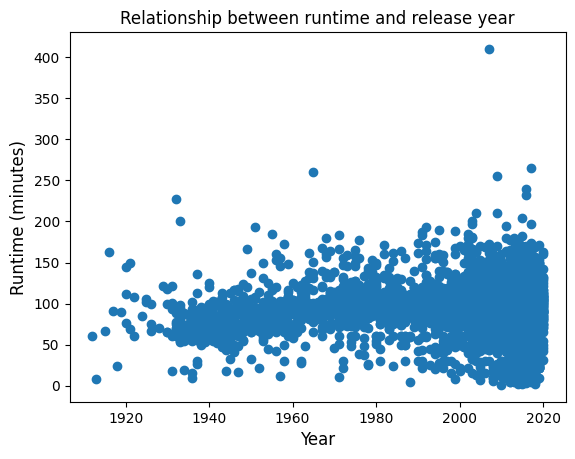

In [23]:
plt.scatter(moviesDF['Year'], moviesDF['Runtime'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Runtime (minutes)', fontsize=12)
plt.title('Relationship between runtime and release year')
plt.show()

**Analysis:** The scatter plot shows an increasing trend in movie runtime over the years, with more recent movies generally having longer runtimes. There is significant variability, especially in recent decades, indicating a wide range of movie lengths.

### 3.4a Extra: Generate dummies from the IMDB Categories Good, Average, Bad movies (2’)

In [24]:
moviesDF['IMDbCategory'] = moviesDF['IMDb'].apply(IMDbRatingCategory)
moviesDF

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Directors,Genres,Country,Language,Runtime,Disney+,Hulu,Prime Video,IMDbCategory
11010,11011,Angel of the Skies,2013,13+,4.0,NaN,0,Christopher-Lee dos Santos,"Crime,Drama,Thriller,War",South Africa,"German,English",98.0,0,0,1,Average
10564,10565,Con Men,2015,Not Rated,6.2,NaN,0,Zak Knutson,"Action,Comedy",United States,English,100.0,0,0,1,Good
2115,2116,Whitney Cummings: Money Shot,2010,18+,6.3,NaN,1,John Fortenberry,"Documentary,Comedy",United States,English,48.0,0,0,1,Good
11751,11752,Polar Storm,2009,13+,3.7,NaN,0,Paul Ziller,"Action,Adventure,Drama,Sci-Fi,Thriller","United States,Canada",English,92.0,0,0,1,Bad
6664,6665,"Michael Jordan, Above and Beyond",1996,all,8.5,NaN,0,NaN,"Documentary,Sport",United States,English,54.0,0,0,1,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,5330,True Legend,2010,18+,6.4,64%,0,Woo-Ping Yuen,"Action,Drama,History",China,Mandarin,115.0,0,0,1,Good
6283,6284,The New York Ripper,1982,Not Rated,6.4,17%,0,Lucio Fulci,"Horror,Mystery,Thriller",Italy,"Italian,Spanish",91.0,0,0,1,Good
3327,3328,Gina Yashere: Skinny B*tch,2008,Not Rated,6.1,NaN,1,Paul M. Green,"Documentary,Comedy",United Kingdom,English,58.0,0,0,1,Good
4483,4484,The Act of Killing,2012,Not Rated,8.2,95%,0,"Joshua Oppenheimer,Anonymous,Christine Cynn","Documentary,Biography,Crime,History","United Kingdom,Denmark,Norway","Indonesian,English",117.0,0,0,1,Good


### 3.4b Extra: Use the dummies features to assign a color to the data points in the scatter plot (2’)
State your findings from the scatter plot (within 50 words).

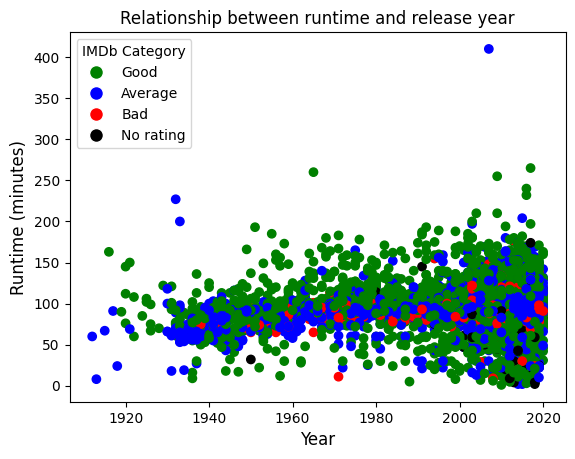

In [25]:
colors = {'Good': 'green', 'Average': 'blue', 'Bad': 'red', 'No rating': 'black'}
labels = list(colors.keys())

plt.scatter(moviesDF['Year'], moviesDF['Runtime'], c=moviesDF['IMDbCategory'].apply(lambda x: colors[x]))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Runtime (minutes)', fontsize=12)
plt.title('Relationship between runtime and release year')
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in colors.items()]
plt.legend(handles=handles, labels=labels, title='IMDb Category', loc='upper left')
plt.show()

**Analysis:** The scatter plot shows an increasing trend in movie runtime over the years, with significant variability. "Good" movies (green) are more prevalent in recent years, while "Bad" movies (red) and "Average" movies (blue) are more scattered across different runtimes and release years.

## 3.5 Show the trend of average IMDB ratings per year, using a line chart. (4')
State your findings from the line chart (within 50 words).

Text(0.5, 1.0, 'Trend of average IMDb ratings per year')

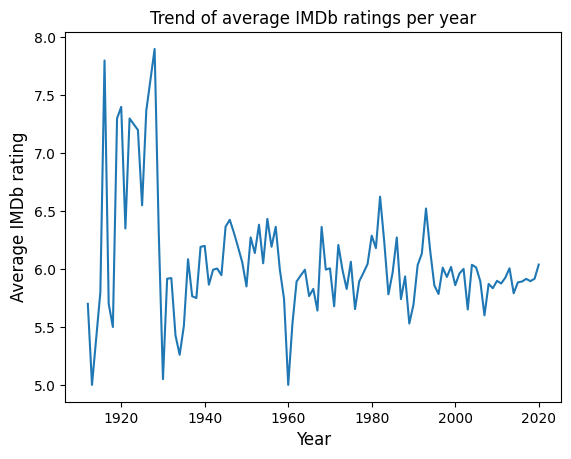

In [26]:
moviesDF.groupby('Year')['IMDb'].mean().plot()
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average IMDb rating', fontsize=12)
plt.title('Trend of average IMDb ratings per year')

**Analysis:**The line graph shows the fluctuating average IMDb ratings over the years, with early peaks in the 1920s and 1930s, and a general stability around 6.0 post-1960, with minor variations.

## 3.6 Create a boxplot to visualize the IMDB ratings of movies on different platforms. (6')
State your findings by comparing movie ratings on different platforms (within 100 words).

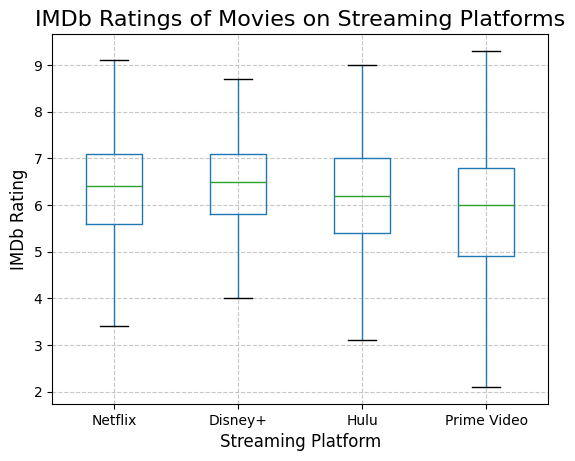

In [27]:
platformsArr = ['Netflix', 'Disney+', 'Hulu', 'Prime Video']
platform_data = []

for platform in platformsArr:
    platform_movies = moviesDF[moviesDF[platform] == 1]['IMDb'].dropna()
    platform_data.append(platform_movies)

platform_df = pd.DataFrame({
    'Netflix': platform_data[0],
    'Disney+': platform_data[1],
    'Hulu': platform_data[2],
    'Prime Video': platform_data[3]
})

platform_df.boxplot(showfliers=False)
plt.title('IMDb Ratings of Movies on Streaming Platforms', fontsize=16)
plt.ylabel('IMDb Rating', fontsize=12)
plt.xlabel('Streaming Platform', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Analysis:** The box plot compares IMDb ratings across Netflix, Disney+, Hulu, and Prime Video. Netflix and Disney+ have similar medians around 6.5 with varied ratings, Hulu shows a consistent median with more low-rated outliers, and Prime Video has a lower median with the broadest rating range, indicating diverse content quality. Overall, while all platforms have a similar central tendency in ratings, they differ in the spread and variability of their movie ratings, which suggests each platform's unique approach to content and audience preferences.

## 3.7 Visualize the number of movies found on each platform, using a bar chart. (6')

Text(0.5, 1.0, 'Number of Movies on Each Streaming Platform')

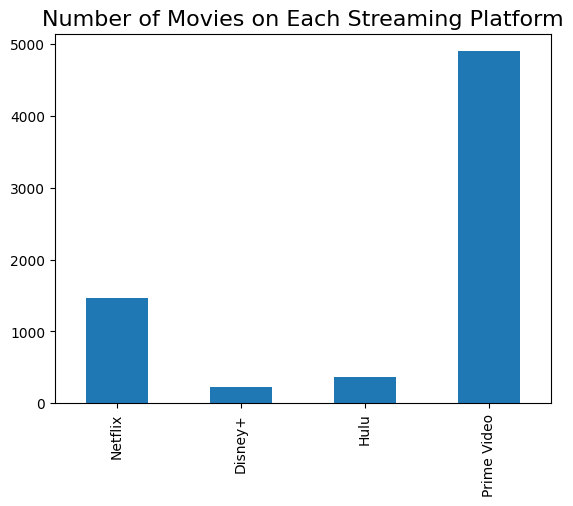

In [28]:
platformsArr = ['Netflix', 'Disney+', 'Hulu', 'Prime Video']
platform_counts = moviesDF[platformsArr].sum()
platform_counts.plot(kind='bar')
plt.title('Number of Movies on Each Streaming Platform', fontsize=16)

**Analysis:**The bar chart reveals Prime Video dominates with nearly 5000 movies, Netflix follows with around 1500, Hulu has about 500, and Disney+ trails with the fewest, under 500, indicating a significant disparity in content volume across platforms.

## 3.8 Visualize the distribution of runtime of all movies, using a histogram. (7')

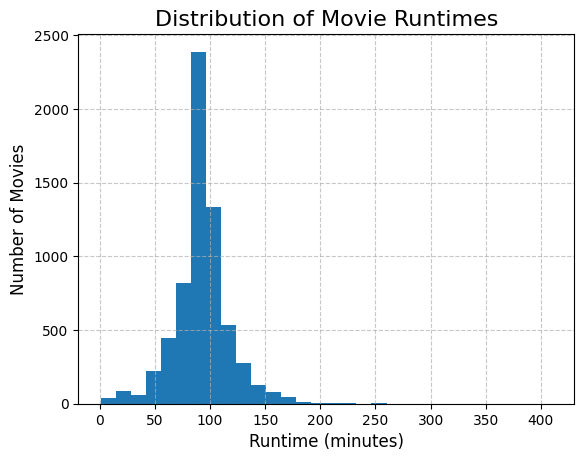

In [29]:
moviesDF['Runtime'].hist(bins=30)
plt.title('Distribution of Movie Runtimes', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

**Analysis:**The histogram shows most movies run 90-120 minutes, peaking around 100 minutes, indicating an ideal length for viewer engagement. Few films exceed 150 minutes, with a rapid decline after, reflecting industry standards for runtime.

## 3.9 Create a word cloud visualization for the ‘Genres’. (6')
State your findings from the wordcloud (within 50 words).

Text(0.5, 1.0, 'Genres Word Cloud')

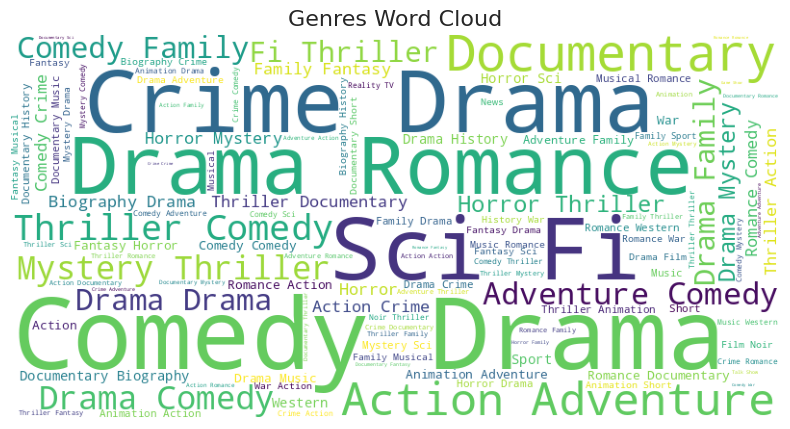

In [65]:
genres = moviesDF['Genres'].dropna().str.cat(sep=',')
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Genres Word Cloud', fontsize=16)

**Analysis:** "Comedy," "Drama," and "Action" dominate the word cloud, showing strong audience interest. "Sci-Fi" and "Thriller" also stand out, marking a taste for diverse and engaging narratives.

### 3.9a Analyse the frequency of the words then set a threshold for visualization (2')
Remove too much frequent words and too less frequent words. Use NLP if you wish.

Text(0.5, 1.0, 'Genres Word Cloud')

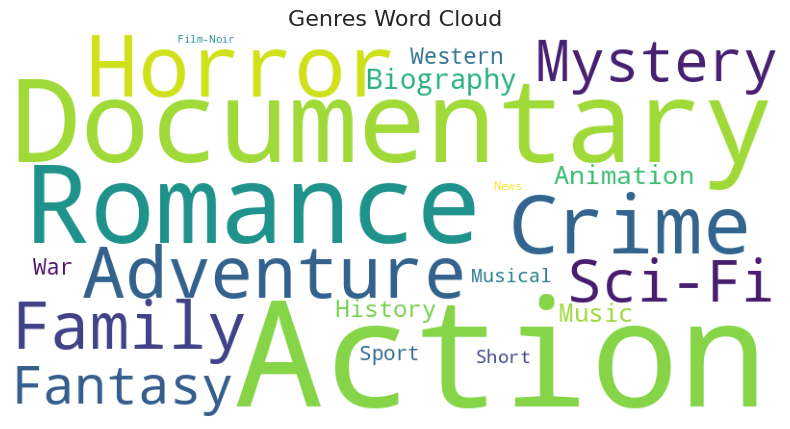

In [66]:
import numpy as np

# Split the genres into individual words
genres_list = genres.split(',')
# Count the frequency of each word
genres_freq = {}
for genre in genres_list:
    if genre in genres_freq:
        genres_freq[genre] += 1
    else:
        genres_freq[genre] = 1

sorted_data = sorted(genres_freq.items(), key=lambda x: x[1])
frequencies = np.array([item[1] for item in sorted_data])
lower_threshold = np.percentile(frequencies, 10)
upper_threshold = np.percentile(frequencies, 90)

# filter the movies
filtered_data = {genre: count for genre, count in sorted_data if lower_threshold <= count <= upper_threshold}
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(filtered_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Genres Word Cloud', fontsize=16)

**Analysis:** The refined word cloud highlights "Documentary," "Action," and "Horror" as prominent genres, with "Romance" and "Sci-Fi" also standing out, reflecting diverse viewer preferences.

### 3.9b Extra: Select a mask for the word cloud (2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/data//cloud_mask (1).png
/content/drive/MyDrive/Colab Notebooks/data//twitter_mask (1).png


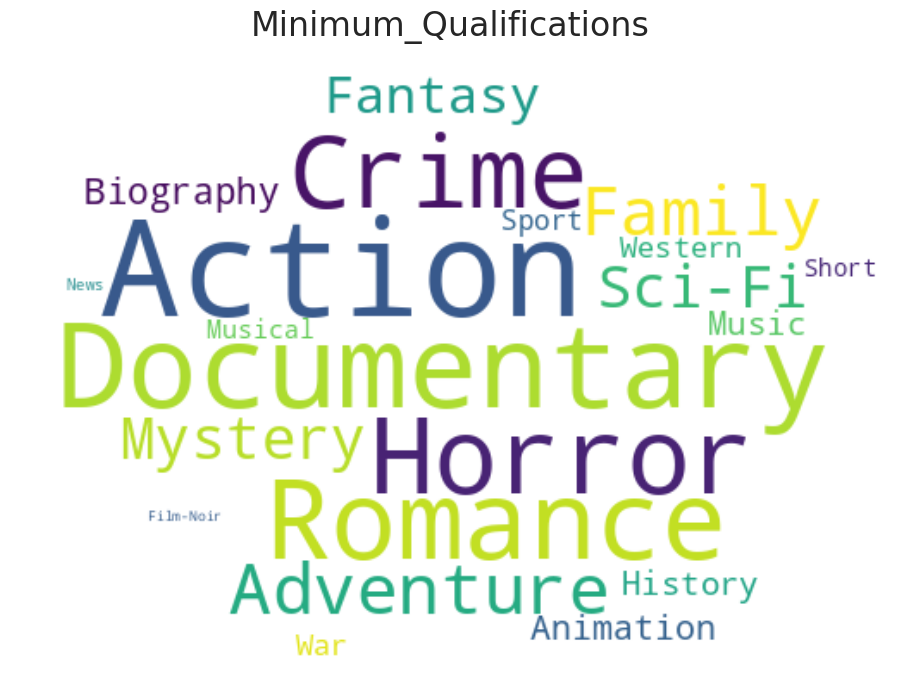

In [67]:
drivePath = '/content/drive'
drive.mount(drivePath)
baseURL = 'https://raw.githubusercontent.com/pmengoni/AIDM7330-2223S1/main/'
images = ['cloud_mask.png', 'twitter_mask.png']
dataPath = drivePath + '/MyDrive/Colab Notebooks/data/'

for img in images:
  fullURL = baseURL + img
  fileName = wget.download(fullURL, out=dataPath)
  print(fileName)

cloud = np.array(Image.open(dataPath + 'cloud_mask.png'))
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=cloud,background_color="white").generate_from_frequencies(filtered_data)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Minimum_Qualifications',size=24)
plt.show()

# <div style="color: LimeGreen">Part 4: Exploratory Data Analysis and Visualization [30%]</div>
By exploring the data, generate three additional Research Questions.

Answer them with queries and visualizations. Note that:
- At least one RQ should be answered with small multiple charts (subplots)
- At least one question should be answered using pivot tables
- Use at least a different visualization for each research question

Write down your analysis in 200/300 words per question.    

## RQ1 (Multiples subplots): What is the trend in movie runtime across different decades?

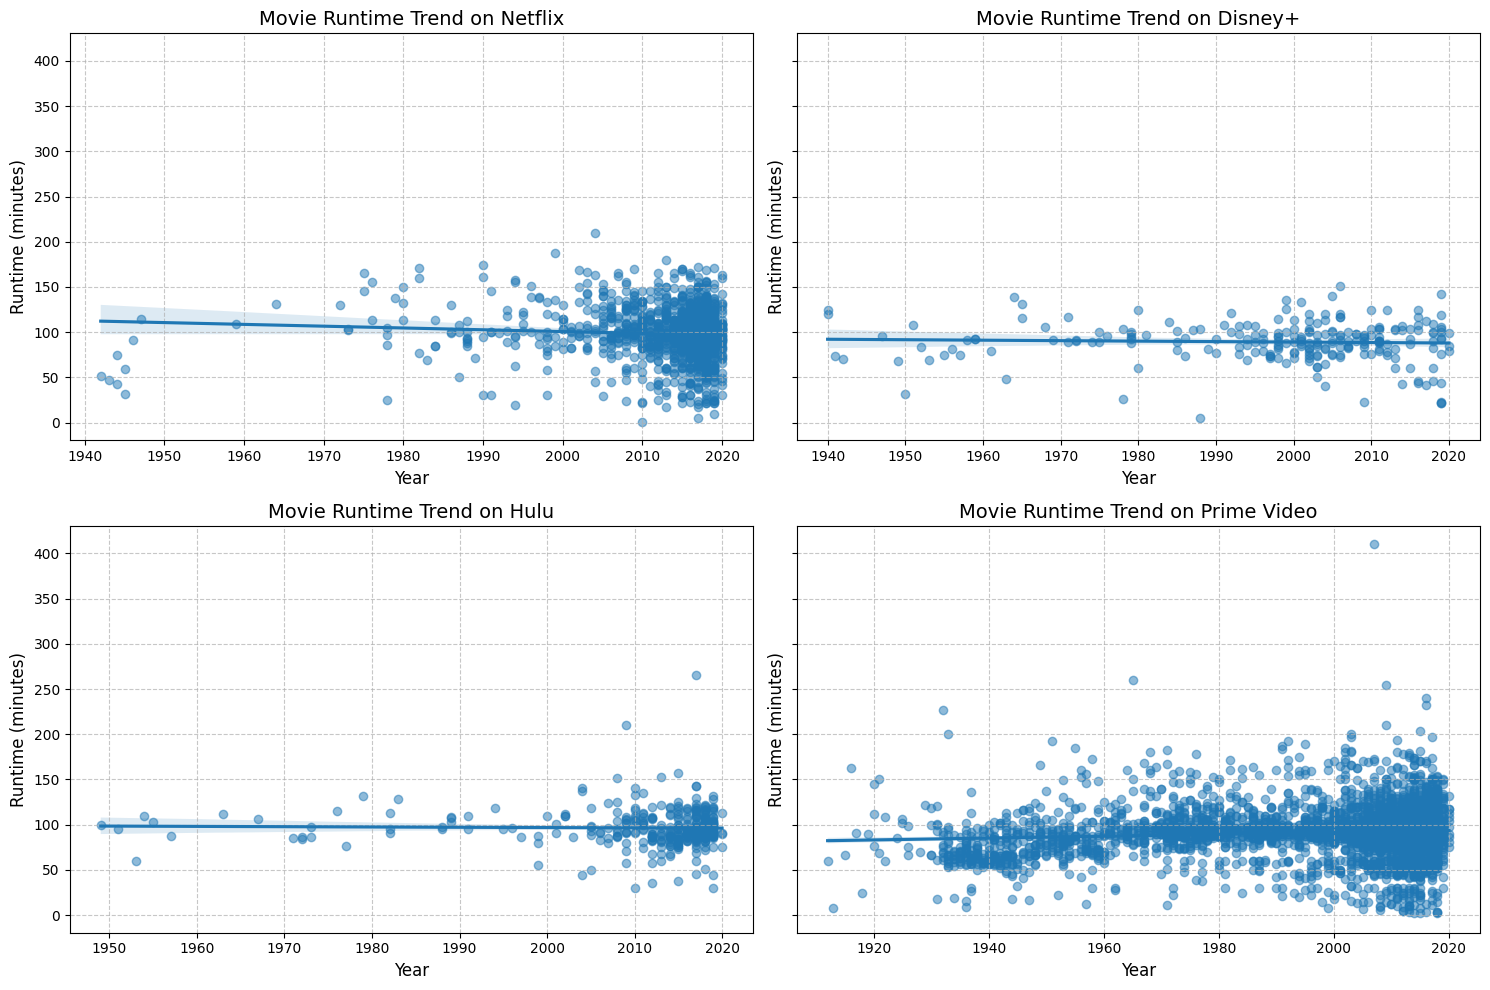

In [32]:
# 1. Create a line chart to show the trend of movie runtime over the years for each platform
import seaborn as sns

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
platforms = ['Netflix', 'Disney+', 'Hulu', 'Prime Video']

for ax, platform in zip(axes.flatten(), platforms):

    platform_movies = moviesDF[moviesDF[platform] == 1]
    sns.regplot(x='Year', y='Runtime', data=platform_movies, ax=ax, scatter_kws={'alpha':0.5})
    ax.set_title(f'Movie Runtime Trend on {platform}', fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Runtime (minutes)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Analysis:**The provided scatter plots for Netflix, Disney+, Hulu, and Prime Video offer a visual representation of movie runtime trends across different decades. Each plot reveals a general stability in the average runtime of movies, with a slight increase observed towards the end of the 20th century and the beginning of the 21st century.

For Netflix, the data points are densely packed around the 90 to 120-minute mark, with a few outliers extending beyond 150 minutes. This suggests that Netflix has maintained a consistent runtime for its movies, catering to viewer preferences for feature-length films without significant deviation.

Disney+, known for its family-friendly content, also shows a similar pattern with a concentration of movies around the 90-minute mark. However, there is a noticeable presence of longer runtimes, likely due to the inclusion of live-action and animated features that often exceed the average length.

Hulu's trend is comparable to Netflix, with a majority of movies clustering in the same runtime range. This indicates that Hulu's content strategy aligns with the industry standard for movie lengths, providing a familiar viewing experience to its audience.

Prime Video's scatter plot is more dispersed, with a broader range of runtimes. This could be attributed to the platform's diverse content library, which includes a mix of mainstream and indie films, leading to a wider variety of movie lengths.

Overall, the trend in movie runtime across different decades, as depicted by these streaming platforms, is one of relative stability with a slight upward trend in recent years. This could be due to various factors, including advancements in storytelling, audience expectations, and the competitive landscape of the streaming industry. The data suggests that while there is room for longer content, the sweet spot for movie runtimes remains around 90 to 120 minutes, a duration that balances narrative depth with viewer attention spans.

## RQ2 (Pivot table): Which types of movies are most popular on different streaming platforms?

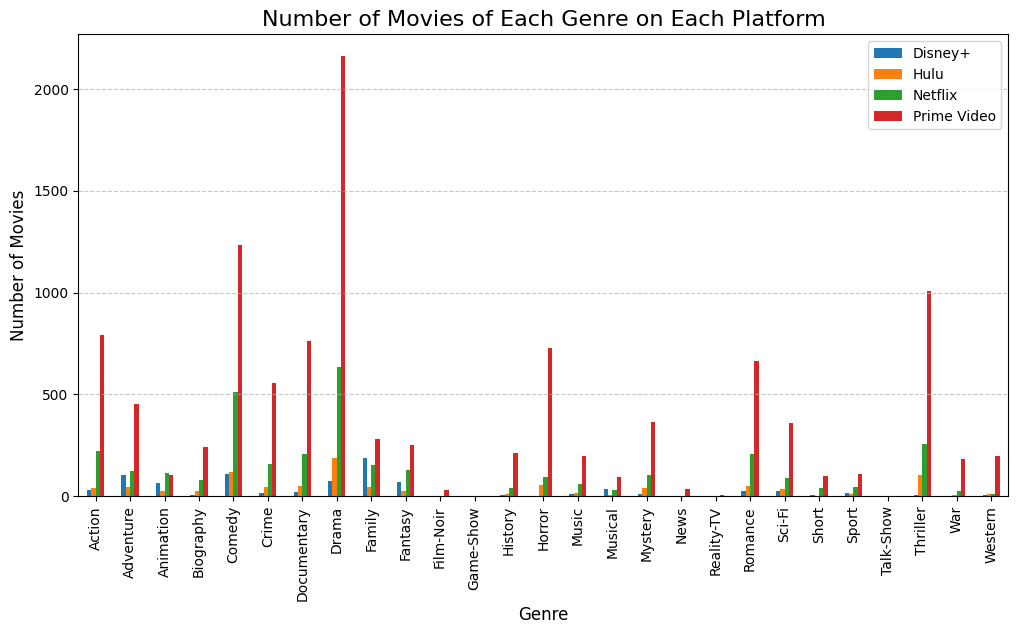

In [33]:
# Create a pivot table to analyze the number of movies of each genre on each platform
moviesDF['GenresArr'] = moviesDF['Genres'].str.split(',')
genres_df = moviesDF.explode('GenresArr')
genres_pivot = genres_df.pivot_table(index='GenresArr', values=platformsArr, aggfunc='sum')
genres_pivot
# Plot the results using a bar chart
genres_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Movies of Each Genre on Each Platform', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Analysis:**
The bar chart provides a comparative analysis of the popularity of various movie genres on four major streaming platforms: Disney+, Hulu, Netflix, and Prime Video. The data is represented by the number of movies available in each genre on the respective platforms.

Prime Video stands out with a significant lead in the "Drama" genre, hosting over 2000 titles, which is a testament to its extensive collection of narrative-driven films. This is followed by a strong presence in the "Comedy" and "Action" genres, with each having over 500 titles, indicating a diverse offering that caters to a wide audience.

Netflix also shows a notable number of "Drama" films, although not as extensive as Prime Video, and it has a substantial collection in the "Comedy" and "Action" genres as well. However, Netflix seems to have a more balanced distribution across genres, with a significant number of titles in "Animation," "Biography," and "Crime," suggesting a strategy to appeal to various tastes.

Disney+, with its focus on family-friendly content, has a high number of "Animation" and "Family" movies, which aligns with its brand image. The platform also has a considerable collection of "Comedy" and "Action" films, but the numbers are not as high as those of Prime Video and Netflix.

Hulu, on the other hand, has a more even distribution across genres, with "Comedy" and "Drama" being slightly more prominent. This suggests that Hulu may be targeting a demographic that appreciates a mix of light-hearted and serious content.

In summary, each platform has its own unique strengths in terms of genre offerings. These trends reflect the strategic content acquisition and curation of each platform to attract and retain subscribers with diverse preferences.

## RQ3: (Open question)What common characteristics do the highest-rated movies share?

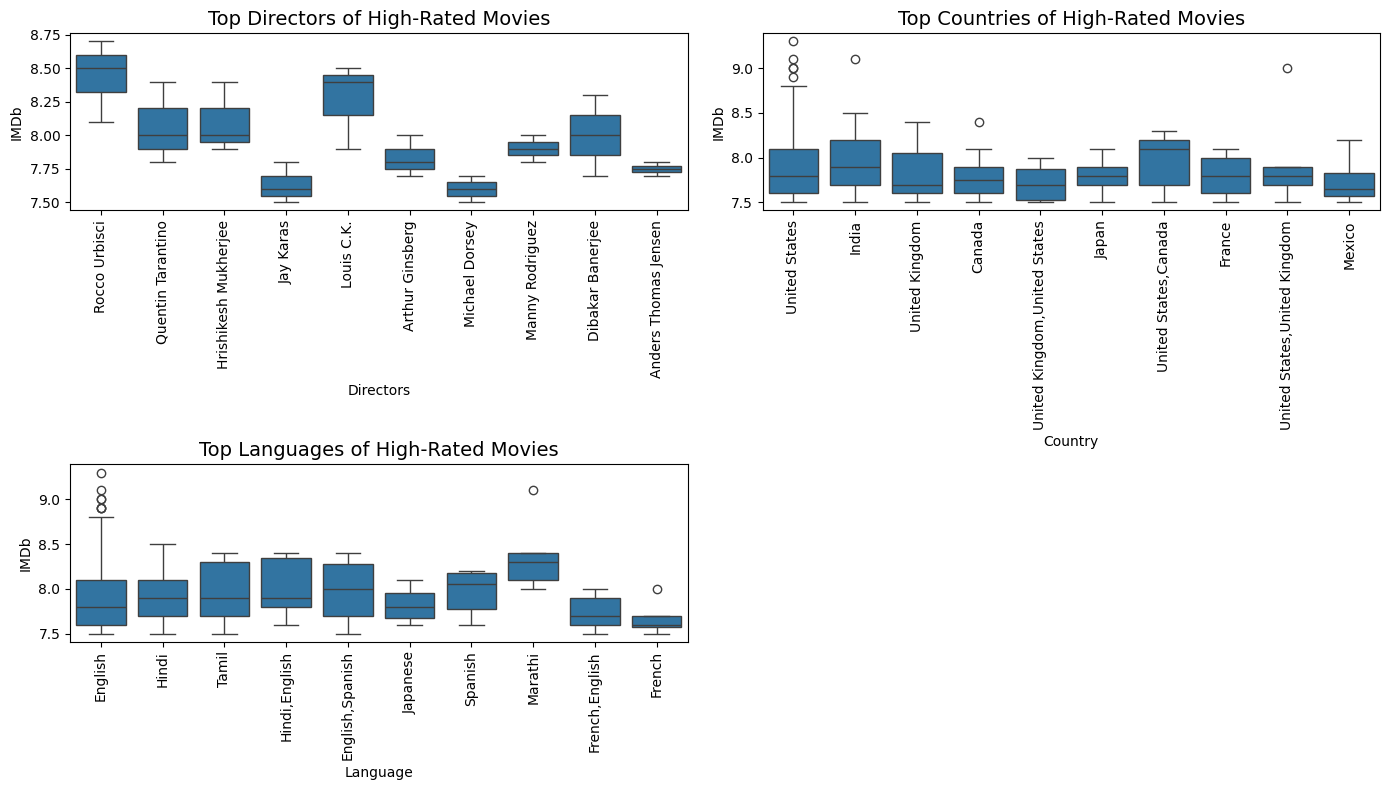

In [35]:
# Calculate the 90th percentile of IMDb ratings
high_rating_threshold = moviesDF['IMDb'].quantile(0.90)

# Separate high-rated movies from average-rated ones
high_rated_movies = moviesDF[moviesDF['IMDb'] >= high_rating_threshold]
regular_movies = moviesDF[moviesDF['IMDb'] < high_rating_threshold]

# Create boxplot
plt.figure(figsize=(14, 8))

# Directors
plt.subplot(2, 2, 1)
sns.boxplot(x='Directors', y='IMDb', data=high_rated_movies, order=high_rated_movies['Directors'].value_counts().index[:10])
plt.title('Top Directors of High-Rated Movies', fontsize=14)
plt.xticks(rotation=90)

# Country
plt.subplot(2, 2, 2)
sns.boxplot(x='Country', y='IMDb', data=high_rated_movies, order=high_rated_movies['Country'].value_counts().index[:10])
plt.title('Top Countries of High-Rated Movies', fontsize=14)
plt.xticks(rotation=90)

# Language:
plt.subplot(2, 2, 3)
sns.boxplot(x='Language', y='IMDb', data=high_rated_movies, order=high_rated_movies['Language'].value_counts().index[:10])
plt.title('Top Languages of High-Rated Movies', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Analysis:**The box plots presented provide insights into the common characteristics of the highest-rated movies based on the directors, countries of origin, and languages.

From the "Top Directors of High-Rated Movies" plot, we observe that certain directors have a higher concentration of movies with ratings in the upper quartile, indicating a consistent ability to deliver critically acclaimed films. Notably, directors like Rocco Urbisci and Quentin Tarantino show a tendency to produce movies that are well-received, as evidenced by the median line's position within the upper half of their box plots.

The "Top Countries of High-Rated Movies" plot reveals that countries like India, the United Kingdom, and the United States have a significant number of high-rated movies. The presence of outliers in these countries suggests the production of exceptional films that have achieved high acclaim, possibly due to a robust film industry infrastructure and a diverse range of storytelling.

The "Top Languages of High-Rated Movies" plot indicates that English is the dominant language for high-rated movies, which could be attributed to the global reach of English-language films and the large number of productions. However, languages like Hindi, Tamil, and Spanish also have a notable presence, reflecting the international appeal of movies from regions with strong cinematic traditions.

In summary, the highest-rated movies tend to be directed by a select group of acclaimed directors, originate from countries with established film industries, and are often in languages that have a broad audience reach. These characteristics suggest that a combination of directorial excellence, cultural significance, and linguistic accessibility contribute to a movie's high ratings.